In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

# calculate accuracy measures and confusion matrix
from sklearn import metrics

##from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step...
from sklearn.tree import DecisionTreeClassifier

In [4]:
credit_df = pd.read_csv("credit.csv")

In [5]:
credit_df.head(10)  #let us look at the raw data. As is evident, there are lot of missing values 

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee
5,unknown,36,repaid,education,9055,unknown,1 - 4 yrs,2,single male,none,...,unknown/none,35,none,for free,1,1,2,yes,yes,unskilled resident
6,unknown,24,repaid,furniture,2835,501 - 1000 DM,> 7 yrs,3,single male,none,...,building society savings,53,none,own,1,1,1,none,yes,skilled employee
7,1 - 200 DM,36,repaid,car (used),6948,< 100 DM,1 - 4 yrs,2,single male,none,...,other,35,none,rent,1,1,1,yes,yes,mangement self-employed
8,unknown,12,repaid,radio/tv,3059,> 1000 DM,4 - 7 yrs,2,divorced male,none,...,real estate,61,none,own,1,1,1,none,yes,unskilled resident
9,1 - 200 DM,30,critical,car (new),5234,< 100 DM,unemployed,4,married male,none,...,other,28,none,own,2,2,1,none,yes,mangement self-employed


In [6]:
credit_df.shape

(1000, 21)

In [7]:
credit_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence_history,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
default,1000.0,1.300,0.458487,1.0,1.0,1.0,2.00,2.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [9]:
credit_df.describe(include=[np.number])

,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,default,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.300000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.458487,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [10]:
credit_df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_length     1000 non-null   object
 7   installment_rate      1000 non-null   int64 
 8   personal_status       1000 non-null   object
 9   other_debtors         1000 non-null   object
 10  residence_history     1000 non-null   int64 
 11  property              1000 non-null   object
 12  age                   1000 non-null   int64 
 13  installment_plan      1000 non-null   object
 14  housing               1000 non-null   object
 15  existing_credits      1000 non-null   i

In [11]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in credit_df.columns: # Loop through all columns in the dataframe
    if credit_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        credit_df[feature] = pd.Categorical(credit_df[feature]).codes # Replace strings with an integer

In [12]:
credit_df.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,1,6,0,7,1169,4,3,4,3,2,...,2,67,1,1,2,1,1,1,1,1
1,0,48,4,7,5951,2,1,2,1,2,...,2,22,1,1,1,2,1,0,1,1
2,3,12,0,4,2096,2,2,2,3,2,...,2,49,1,1,1,1,2,0,1,3
3,1,42,4,5,7882,2,2,2,3,1,...,0,45,1,0,1,1,2,0,1,1
4,1,24,1,1,4870,2,1,3,3,2,...,3,53,1,0,2,2,2,0,1,1
5,3,36,4,4,9055,4,1,2,3,2,...,3,35,1,0,1,1,2,1,1,3
6,3,24,4,5,2835,1,3,3,3,2,...,0,53,1,1,1,1,1,0,1,1
7,0,36,4,2,6948,2,1,2,3,2,...,1,35,1,2,1,1,1,1,1,0
8,3,12,4,7,3059,3,2,2,0,2,...,2,61,1,1,1,1,1,0,1,3
9,0,30,0,1,5234,2,4,4,2,2,...,1,28,1,1,2,2,1,0,1,0


In [13]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int8 
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int8 
 3   purpose               1000 non-null   int8 
 4   amount                1000 non-null   int64
 5   savings_balance       1000 non-null   int8 
 6   employment_length     1000 non-null   int8 
 7   installment_rate      1000 non-null   int64
 8   personal_status       1000 non-null   int8 
 9   other_debtors         1000 non-null   int8 
 10  residence_history     1000 non-null   int64
 11  property              1000 non-null   int8 
 12  age                   1000 non-null   int64
 13  installment_plan      1000 non-null   int8 
 14  housing               1000 non-null   int8 
 15  existing_credits      1000 non-null   int64
 16  default

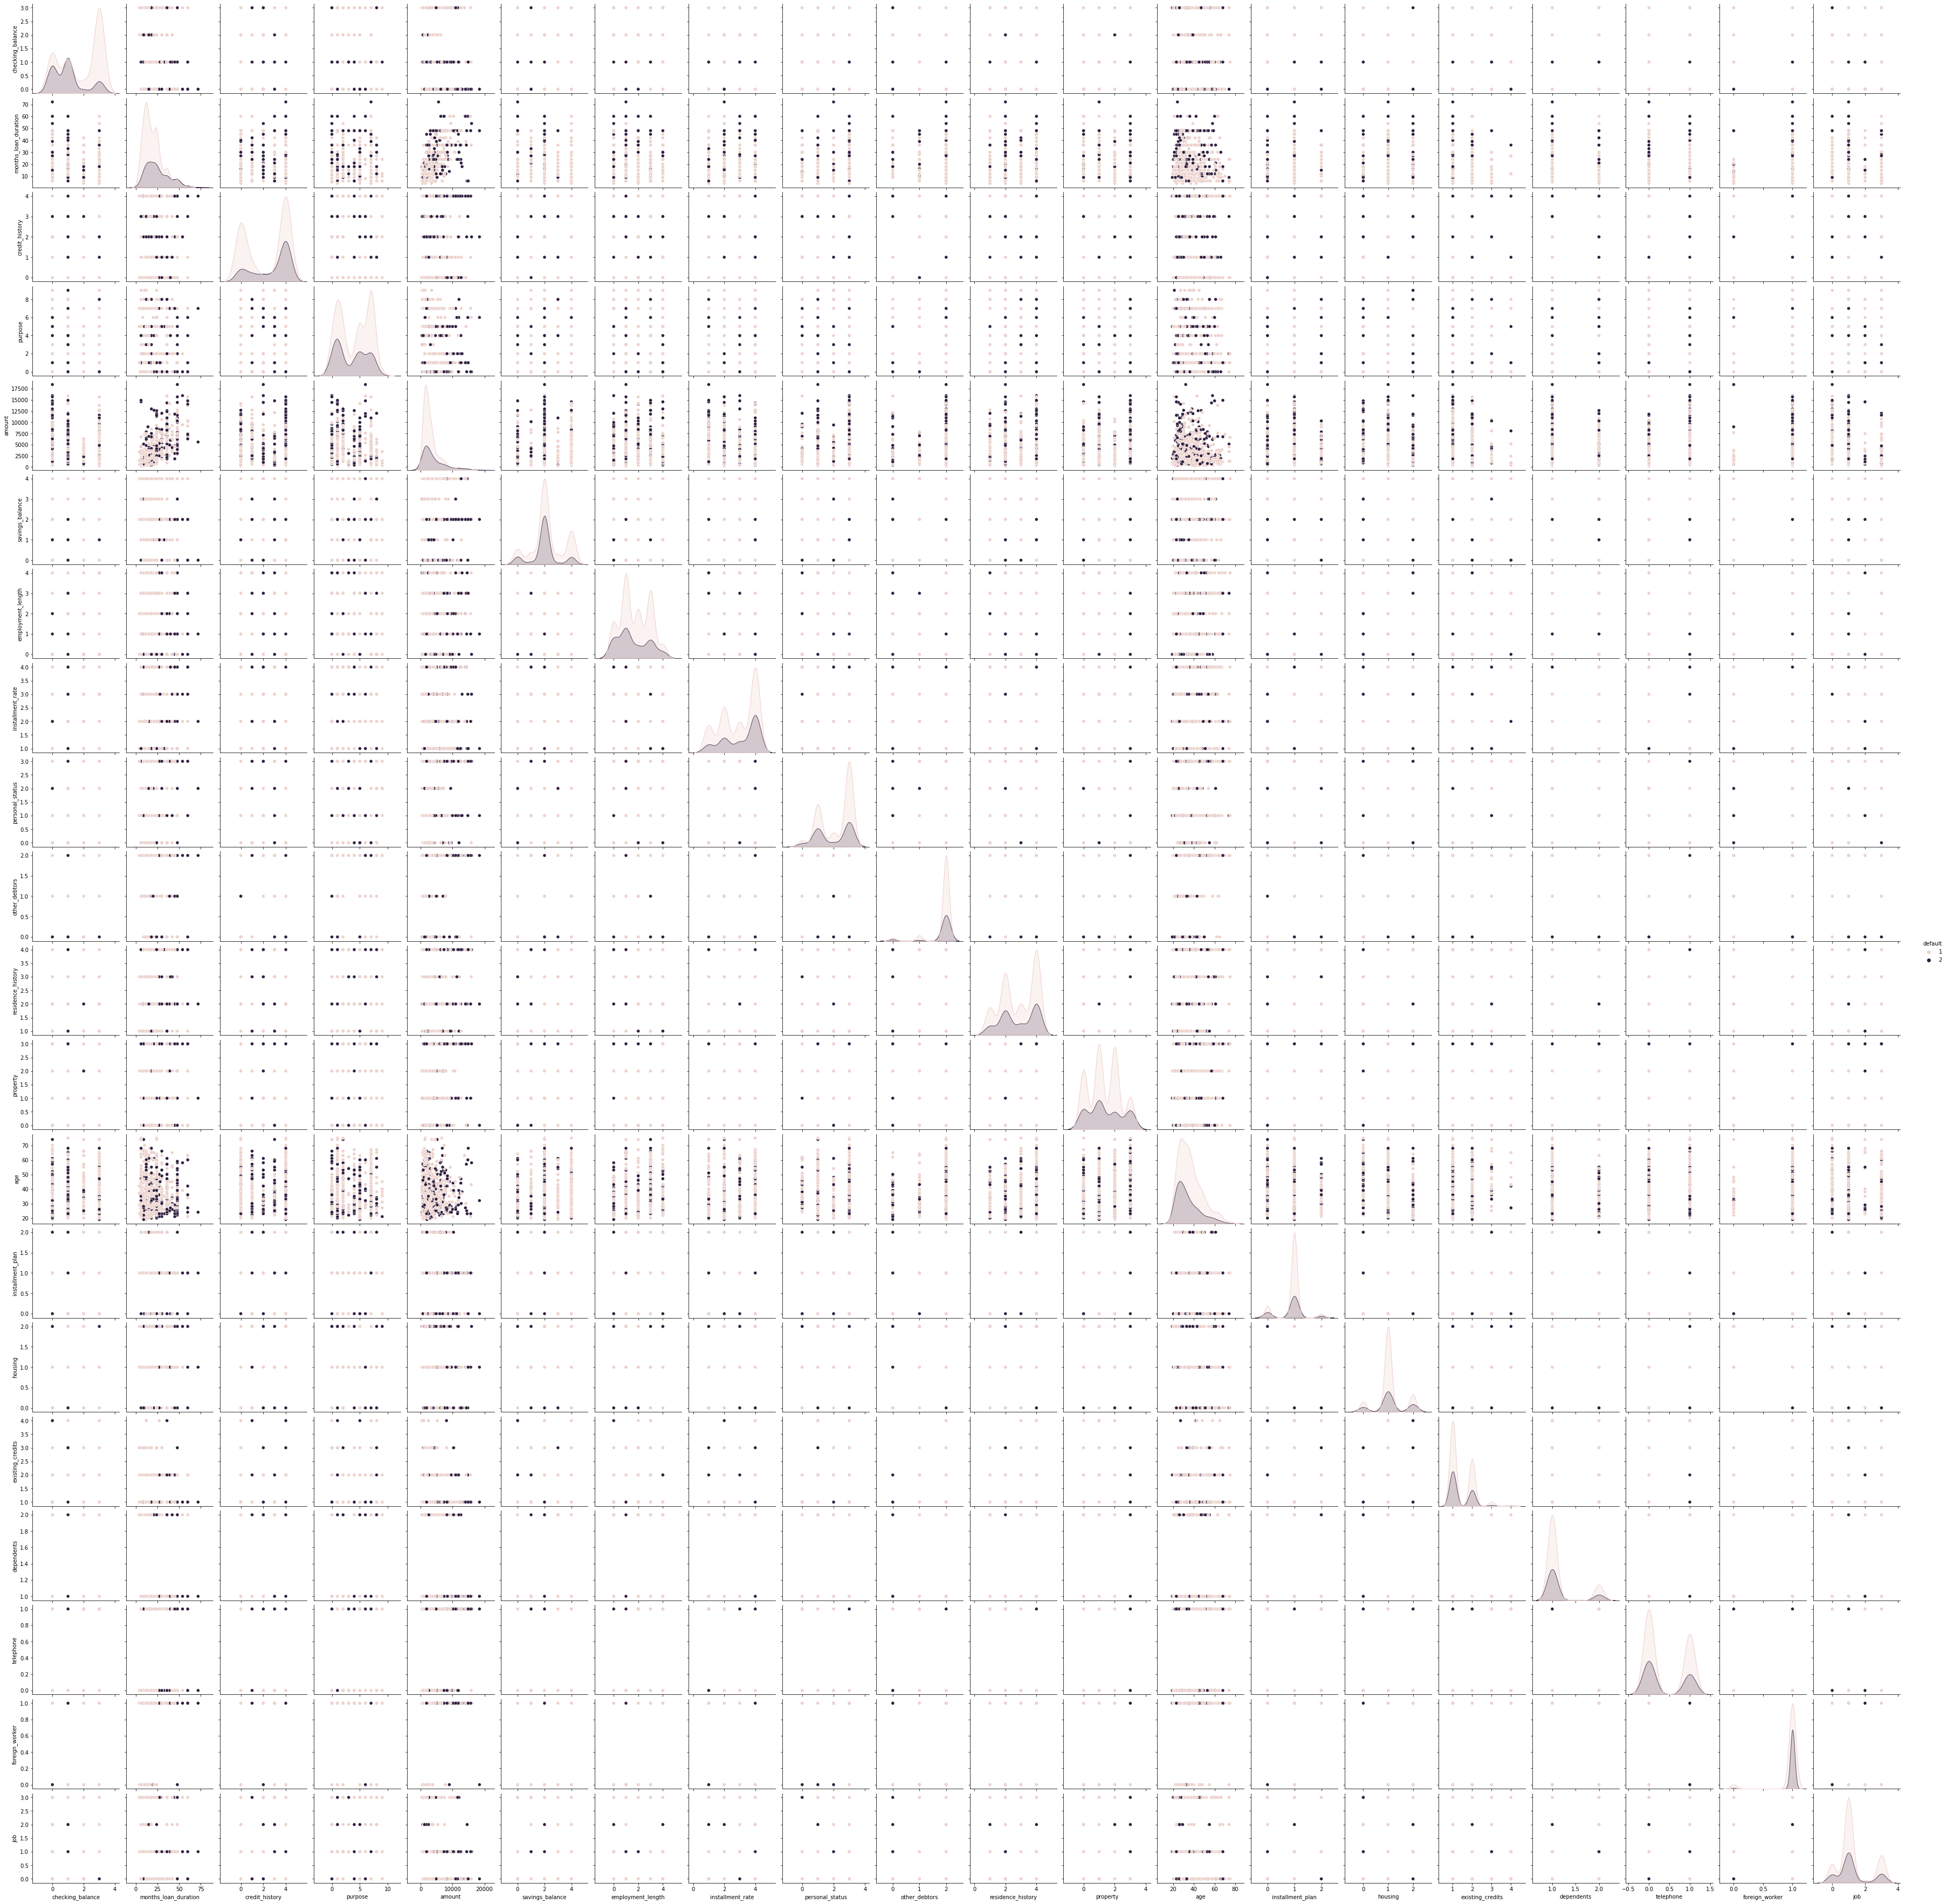

In [14]:
# Pairplot using sns
import seaborn as sns
sns.pairplot(credit_df, hue = "default")

In [15]:
col_labels = [ 'checking_balance', 'months_loan_duration' ,'credit_history' , 'purpose, amount', 'savings_balance' , 'employment_duration'
, 'percent_of_income', 'years_at_residence', 'age', 'other_credit', 'housing', 'existing_loans_count', 'job', 'dependents', 'phone', 'default']

In [18]:
train_char_label = ['No', 'Yes']

In [19]:
# capture the target column ("default") into separate vectors for training set and test set
X = credit_df.drop("default" , axis=1)
y = credit_df.pop("default")

In [20]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [21]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)

#dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 100)
                                  
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [22]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(criterion='entropy')

In [28]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                           Imp
checking_balance      0.098798
months_loan_duration  0.056260
credit_history        0.065718
purpose               0.057339
amount                0.226815
savings_balance       0.040956
employment_length     0.051239
installment_rate      0.033164
personal_status       0.026399
other_debtors         0.042752
residence_history     0.031195
property              0.020604
age                   0.092716
installment_plan      0.044842
housing               0.018942
existing_credits      0.027980
dependents            0.012537
telephone             0.035185
foreign_worker        0.000000
job                   0.016557


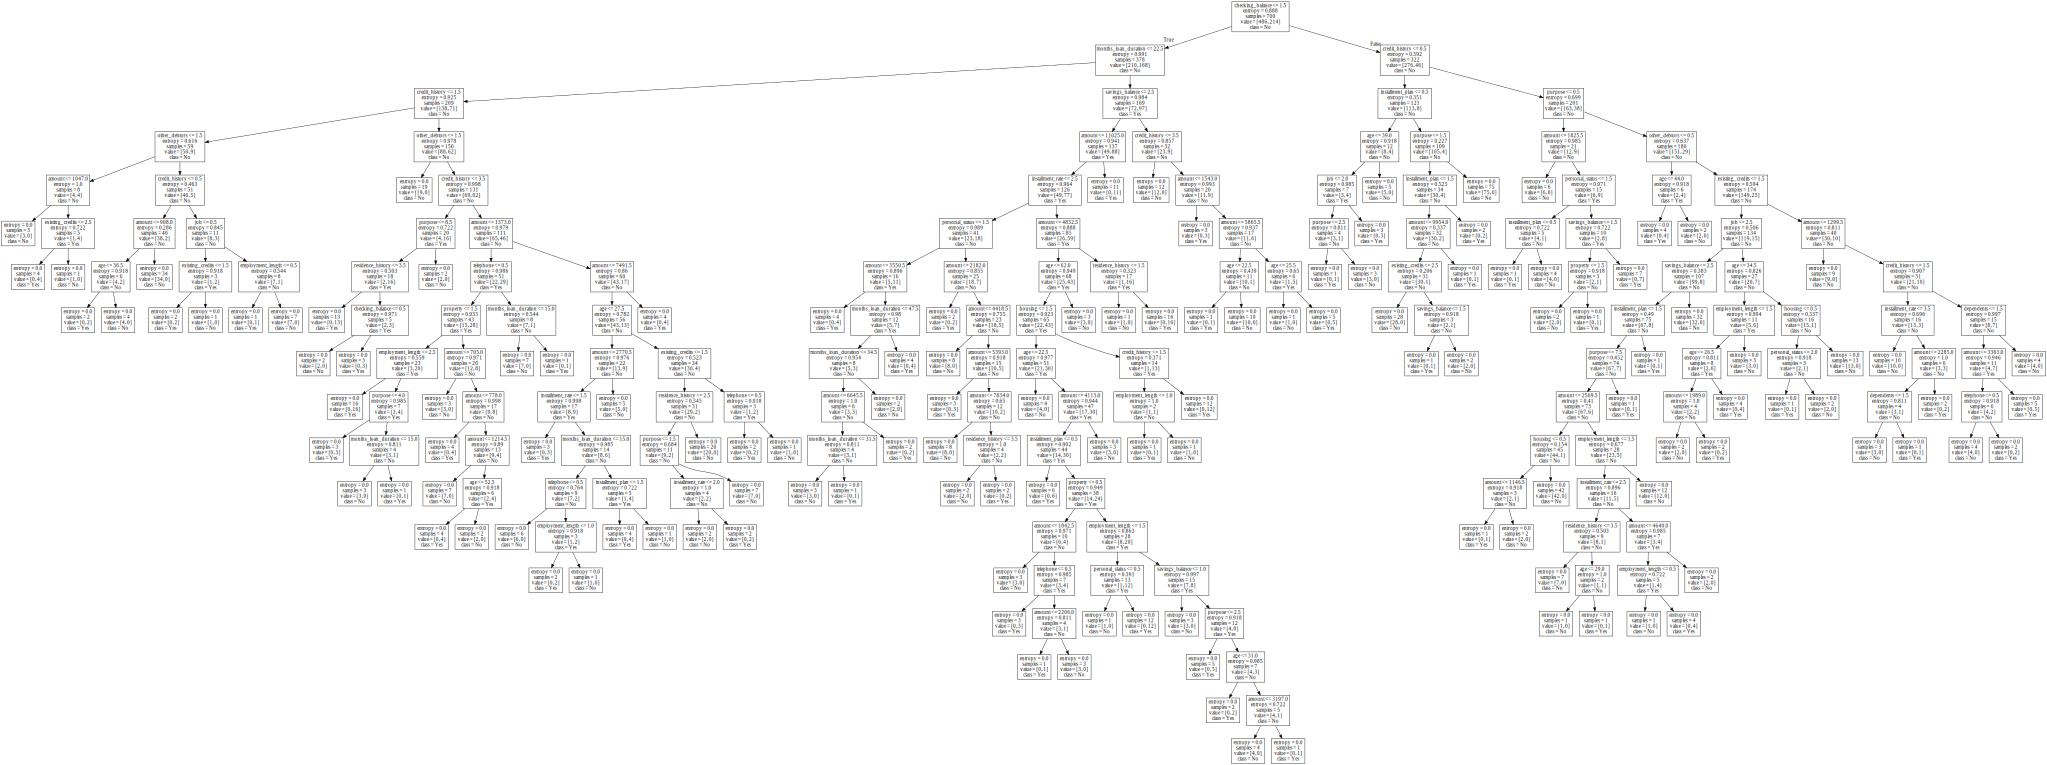

In [33]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view 
#or view inside the jupyter notebook as below

import graphviz

with open("credit_tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [35]:
y_predict = dt_model.predict(X_test)

In [36]:
print(dt_model.score(X_train , train_labels))
print(dt_model.score(X_test, test_labels))

1.0
0.6766666666666666


In [37]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[167  47]
 [ 50  36]]


In [38]:
# Look at the class level metric for the defaulter class. It is poor. 

#                                      Regularising the Decision Tree

In [39]:
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [41]:
credit_tree_regularized = open('credit_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

credit_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                           Imp
checking_balance      0.098798
months_loan_duration  0.056260
credit_history        0.065718
purpose               0.057339
amount                0.226815
savings_balance       0.040956
employment_length     0.051239
installment_rate      0.033164
personal_status       0.026399
other_debtors         0.042752
residence_history     0.031195
property              0.020604
age                   0.092716
installment_plan      0.044842
housing               0.018942
existing_credits      0.027980
dependents            0.012537
telephone             0.035185
foreign_worker        0.000000
job                   0.016557


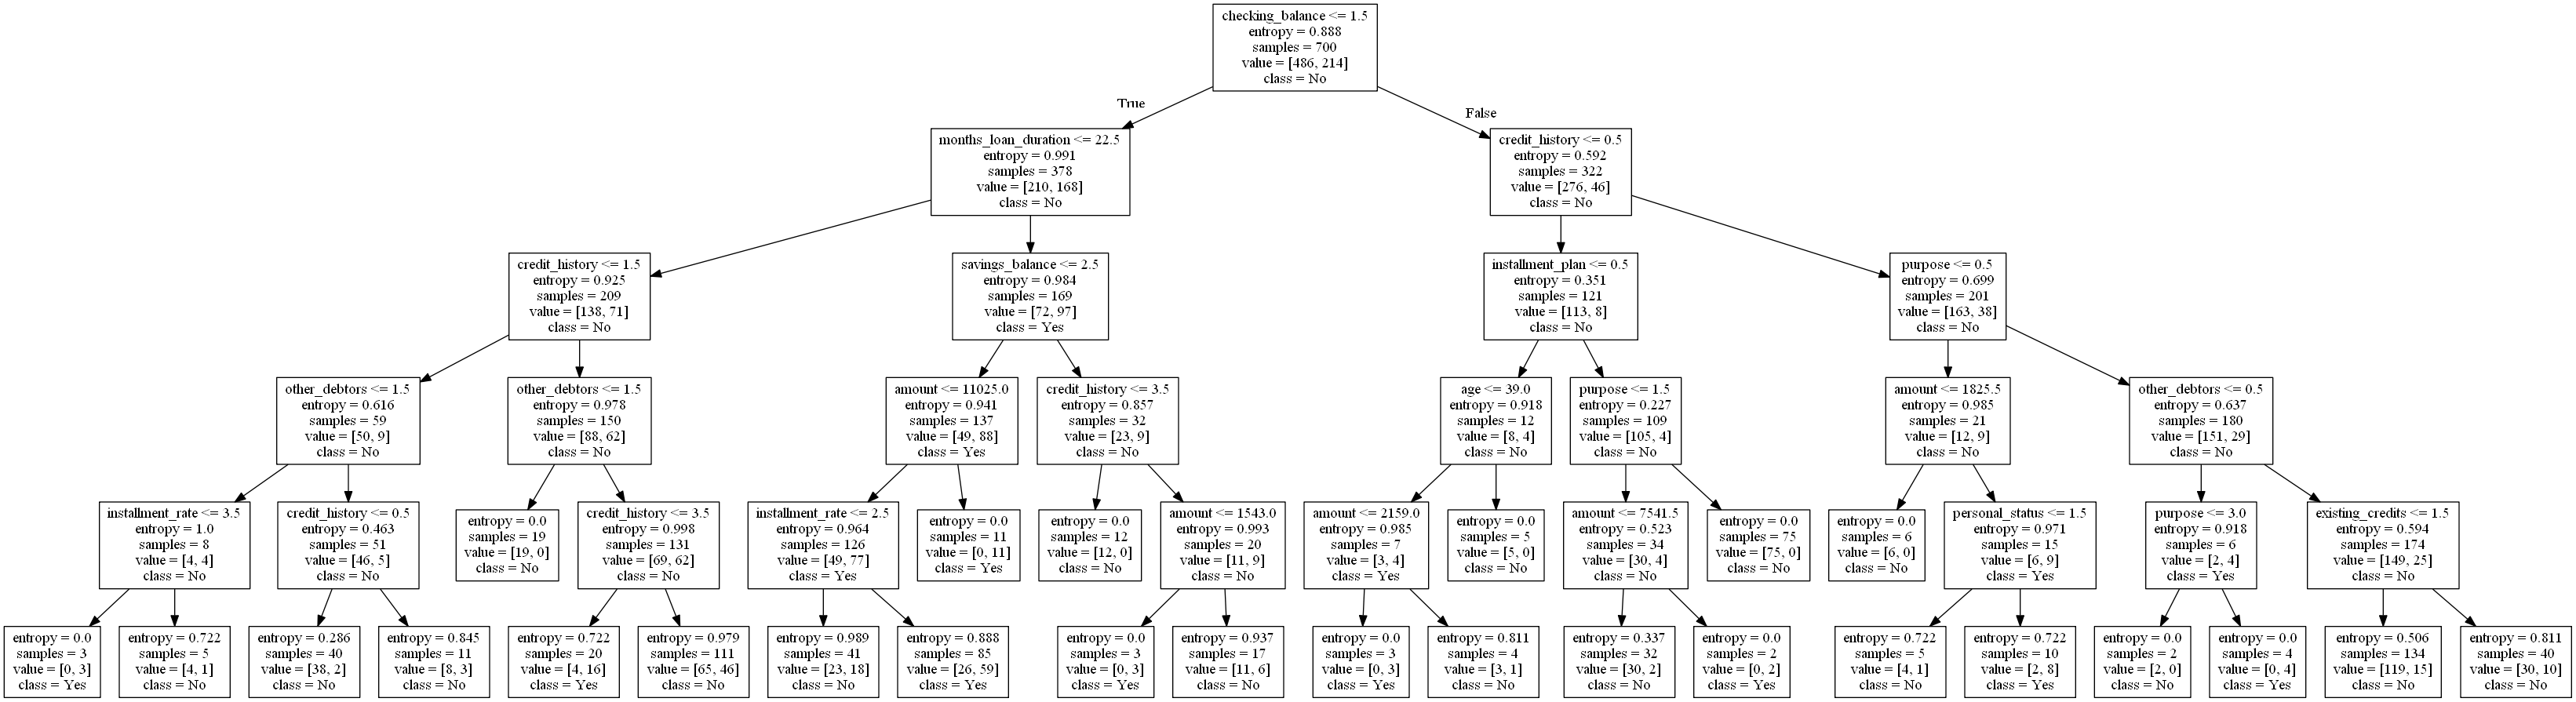

In [42]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view
# or create a .png as below
system("dot -Tpng credit_tree_regularized.dot -o credit_tree_regularized.png")
Image("credit_tree_regularized.png")

In [43]:
y_predict = reg_dt_model.predict(X_test)

In [44]:
reg_dt_model.score(X_test , test_labels)

0.7133333333333334

In [45]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[183  31]
 [ 55  31]]
